<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/DeepLearningFiles/case_study_customercomplain_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Continue to work on the consumer complain dataset. Earlier we have trained
NB model with TF-IDF ( 60 % accuracy). Glove embedding with averaging and NB classifier (~40% accuracy). we will try a few variats of LSTM today and see how the LSTM models perform on this dataset

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir( "/content/drive/My Drive/NLP")

In [ ]:
df1 = pd.read_csv('complaints.csv') # We are taking less rows for faster execution
df1.shape

(179776, 2)

### Load the dataset from the disk

In [ ]:

df = pd.read_csv('complaints.csv', nrows=10000) # We are taking less rows for faster execution
df.head()

,Consumer complaint narrative,Product
0,I have outdated information on my credit repor...,Credit reporting
1,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
2,An account on my credit report has a mistaken ...,Credit reporting
3,This company refuses to provide me verificatio...,Debt collection
4,This complaint is in regards to Square Two Fin...,Debt collection


In [ ]:
df.shape

(10000, 2)

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100 # 600

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Consumer complaint narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21172 unique tokens.


In [ ]:
word_index

{'xxxx': 1,
 'the': 2,
 'i': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'my': 7,
 'of': 8,
 'that': 9,
 'was': 10,
 'they': 11,
 'in': 12,
 'on': 13,
 'not': 14,
 'have': 15,
 'for': 16,
 'this': 17,
 'me': 18,
 'is': 19,
 'with': 20,
 'it': 21,
 'credit': 22,
 'xx': 23,
 'account': 24,
 'from': 25,
 'as': 26,
 'had': 27,
 '00': 28,
 'be': 29,
 'loan': 30,
 'them': 31,
 'would': 32,
 'payment': 33,
 'by': 34,
 'are': 35,
 'we': 36,
 'or': 37,
 'been': 38,
 'at': 39,
 'bank': 40,
 'an': 41,
 'but': 42,
 'no': 43,
 'has': 44,
 'do': 45,
 'did': 46,
 'told': 47,
 'all': 48,
 "n't": 49,
 'information': 50,
 'report': 51,
 'debt': 52,
 'which': 53,
 'were': 54,
 'am': 55,
 'when': 56,
 'their': 57,
 'received': 58,
 'any': 59,
 'company': 60,
 'mortgage': 61,
 'you': 62,
 'so': 63,
 'time': 64,
 'called': 65,
 "''": 66,
 'card': 67,
 'after': 68,
 'pay': 69,
 'payments': 70,
 'if': 71,
 'never': 72,
 'because': 73,
 'out': 74,
 'our': 75,
 "'s": 76,
 'can': 77,
 'get': 78,
 'back': 79,
 'will': 80,


In [ ]:
X_pre = tokenizer.texts_to_sequences(df['Consumer complaint narrative'].values)


In [ ]:
strng= df['Consumer complaint narrative'].iloc[0]
print (strng)

I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements


In [ ]:
len(strng.split())

34

In [ ]:
np.array(X_pre[0])

array([   3,   15, 2909,   50,   13,    7,   22,   51,    9,    3,   15,
        719,  248,    9,   44,  281,    4,   29,  180,   17,   50,   19,
        127,   88, 1852,  107,  470,    5,  215,   14, 1255,   22,  124,
        807])

In [ ]:
print ("length =",len(X_pre[0]))

length = 34


In [ ]:
X = pad_sequences(X_pre, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
print ("length =",len(X[0]))

length = 250


In [ ]:
print('Shape of data tensor:', X.shape)

Shape of data tensor: (10000, 250)


In [ ]:
Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (10000, 13)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9000, 250) (9000, 13)
(1000, 250) (1000, 13)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(64))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 13)                845       
                                                                 
Total params: 5,043,085
Trainable params: 5,043,085
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

Epoch 1/20
127/127 [==============================] - 12s 55ms/step - loss: 2.0181 - accuracy: 0.2446 - val_loss: 1.8956 - val_accuracy: 0.3200
Epoch 2/20
127/127 [==============================] - 5s 41ms/step - loss: 1.7539 - accuracy: 0.3780 - val_loss: 1.6281 - val_accuracy: 0.4100
Epoch 3/20
127/127 [==============================] - 5s 41ms/step - loss: 1.4945 - accuracy: 0.4826 - val_loss: 1.3806 - val_accuracy: 0.5344
Epoch 4/20
127/127 [==============================] - 5s 41ms/step - loss: 1.2525 - accuracy: 0.5931 - val_loss: 1.3956 - val_accuracy: 0.5200
Epoch 5/20
127/127 [==============================] - 5s 41ms/step - loss: 1.1588 - accuracy: 0.6290 - val_loss: 1.3477 - val_accuracy: 0.5722
Epoch 6/20
127/127 [==============================] - 5s 41ms/step - loss: 1.1952 - accuracy: 0.6281 - val_loss: 1.5105 - val_accuracy: 0.5044
Epoch 7/20
127/127 [==============================] - 5s 41ms/step - loss: 0.9737 - accuracy: 0.7138 - val_loss: 1.1797 - val_accuracy: 0.625

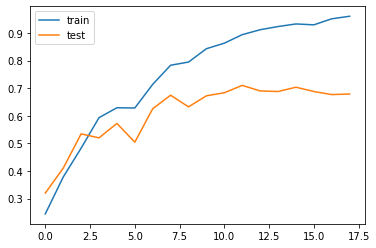

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(MAX_NB_WORDS, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Bidirectional(layers.LSTM(32))(x)
# Add a classifier
outputs = layers.Dense(13, activation="softmax")(x)
model2 = keras.Model(inputs, outputs)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         6400000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 13)                845       
                                                                 
Total params: 6,540,877
Trainable params: 6,540,877
Non-train

In [ ]:
epochs = 40
batch_size = 64
model2.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history2 = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

Epoch 1/40
127/127 [==============================] - 38s 248ms/step - loss: 0.2692 - accuracy: 0.2263 - val_loss: 0.2193 - val_accuracy: 0.2533
Epoch 2/40
127/127 [==============================] - 30s 235ms/step - loss: 0.2193 - accuracy: 0.2704 - val_loss: 0.2172 - val_accuracy: 0.2989
Epoch 3/40
127/127 [==============================] - 30s 234ms/step - loss: 0.2162 - accuracy: 0.2816 - val_loss: 0.2155 - val_accuracy: 0.2989
Epoch 4/40
127/127 [==============================] - 30s 234ms/step - loss: 0.2069 - accuracy: 0.3331 - val_loss: 0.1969 - val_accuracy: 0.3444
Epoch 5/40
127/127 [==============================] - 30s 234ms/step - loss: 0.1931 - accuracy: 0.3894 - val_loss: 0.1944 - val_accuracy: 0.3911
Epoch 6/40
127/127 [==============================] - 30s 234ms/step - loss: 0.1831 - accuracy: 0.4254 - val_loss: 0.1816 - val_accuracy: 0.4522
Epoch 7/40
127/127 [==============================] - 30s 235ms/step - loss: 0.1663 - accuracy: 0.5101 - val_loss: 0.1771 - val_ac

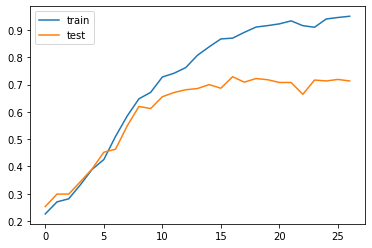

In [ ]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

32/32 [==============================] - 1s 18ms/step - loss: 1.2960 - accuracy: 0.6900


[1.2960333824157715, 0.6899999976158142]

In [ ]:
model2.evaluate(X_test,Y_test)

32/32 [==============================] - 3s 91ms/step - loss: 0.1405 - accuracy: 0.7230


[0.14046098291873932, 0.7229999899864197]